# <center><a href='https://mybinder.org/v2/gh/fortierq/binder-mp2i/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fmp2i-fsm%252Fmp2i-2021%26urlpath%3Dlab%252Ftree%252Fmp2i-2021%252F1_ocaml%252F3_conditions.ipynb%26branch%3Dmain'>Conditions                                                                                                        <img src=https://mybinder.org/badge.svg></a></center>

## Booléens

Une valeur booléenne (bool) est soit true (vrai) soit false (faux). Exemple de variable de type bool :

In [1]:
let a = true

val a : bool = true


## Comparaison

On peut tester l'égalité de deux **valeurs** avec `=` :

In [2]:
3 = 1 + 2

- : bool = true


On peut aussi utiliser `=` sur des variables, auquel cas on compare leurs valeurs :

In [3]:
let a = 3 in
let b = 4 in
a = b (* teste si les valeurs de a et b sont égales *)

- : bool = false


**Attention** : le `=`  de OCaml correspond au `==` de Python. `==` existe en OCaml, mais compare les **adresses mémoires** de 2 variables au lieu de leurs valeurs et on ne l'utilisera presque jamais.

On peut comparer des valeurs numériques avec `<` (inférieur strict), `>`, `<=` (inférieur ou égal), `>=`, `<>` (différent)... :

In [4]:
2 < 1

- : bool = false


Il faut obligatoirement comparer des valeurs de même type :

In [5]:
2.4 < 3 (* on ne peut pas comparer un float avec un int *)

error: compile_error

In [6]:
2.4 < 3.0 (* par contre ceci fonctionne *)

- : bool = true


**Remarque** : pas besoin de mettre des points (.) sur `<`, `>` ...

Les opérateurs `&&` (et), `||` (ou), `not` permettent de combiner des conditions :

In [7]:
1 < 2 && 2 < 3

- : bool = true


In [8]:
let a = 0 in
a <> 0 || a > 3 (* test si a est différent de 0 ou supérieur à 3 *)

- : bool = false


**Exercice**

1. Quelle est la valeur du code suivant?
```ocaml
let a = 42 in
not (a = 42 && (a < 10 || a > 30))
```
2. Comment aurait-on pu écrire `not (a = 42 && (a < 10 || a > 30))` sans `not`?
3. Écrire une fonction `xor : bool -> bool -> bool` telle que `xor a b` renvoie le "ou exclusif" de `a` et `b`, c'est à dire `true` si `a` ou `b` est `true`, mais pas les deux.

In [9]:
(* 1 *)
let a = 42 in
not (a = 42 && (a < 10 || a > 30));; (* false *)

(* 2 *)
(* Pour prendre la négation, on inverse toutes les conditions et opérateurs booléens (< devient >=, && devient || ...) *)
a <> 42 || (a >= 10 && a <= 30)

(* 3. *)
let xor a b = (a || b) && (not a || not b);;
xor true false;;
xor true true;;

- : bool = false


error: compile_error

## Condition if

On peut écrire une condition `if` de la façon suivante en OCaml :
```ocaml
if ... then ... else ...
```
La condition du `if` doit être un booléen. Si la condition est vraie, le `then` est exécuté et sa valeur est renvoyé. Sinon, c'est la valeur du `else` qui est renvoyé :  

In [10]:
if 1 = 2 then 42 else 24

- : int = 24


Définissons par exemple la fonction valeur absolue ($x \longmapsto \vert x \vert$) :

In [11]:
let abs x =
    if x < 0. then -. x
    else x

val abs : float -> float = <fun>


Rappelons qu'il n'y a pas de `return` en OCaml : c'est la dernière expression calculée par la fonction qui est renvoyée. Ainsi `abs x` renvoie `-x` si `x` est négatif et `x` sinon.  

In [12]:
abs (-2.718)  (* je mets des parenthèses à cause du - *)

- : float = 2.718


Pour plus de lisibilité on sautera une ligne avant `then` et `else`, sauf si le contenu du `if` est très court.

**Exercice** : Écrire une fonction `max` renvoyant le maximum de ses 2 arguments.  
Remarque : cette fonction existe déjà et peut être utilisée telle quelle.  

In [13]:
let max x y = if x < y then y else x

val max : 'a -> 'a -> 'a = <fun>


Dans un `if ... then ... else ...`, les valeurs dans le `then` et dans le `else` doivent être de même type :

In [14]:
if 1 = 1 then 2
else 3.14  (* impossible d'avoir 2 types différents dans le then et else *)

error: compile_error

La valeur renvoyée par `if ... then ... else ...` peut être stockée dans une variable :

In [15]:
let a = -5 in
let b = if a > 0 then a else -a in (* on pourrait aussi calculer une valeur absolue comme ça *) 
b  (* b vaut 5 *)

- : int = 5


**Exercice** Définir les fonctions suivantes en OCaml :  
<center>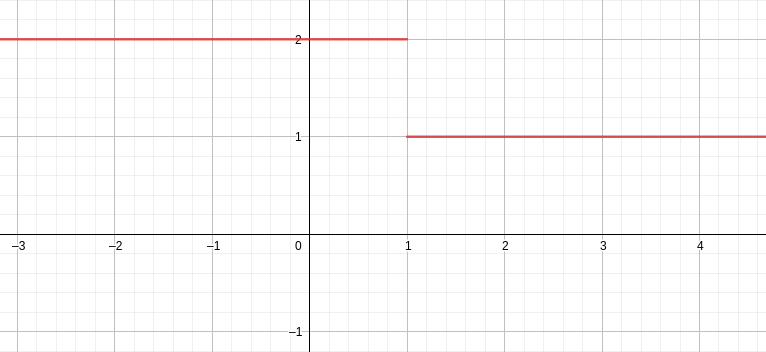
</center>

<center>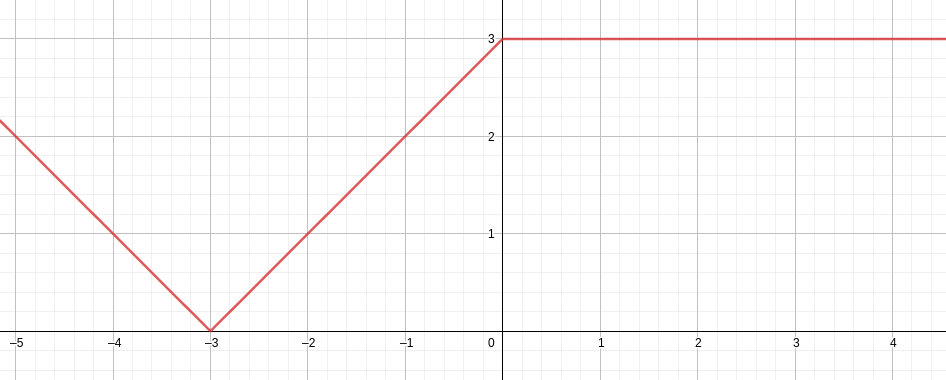</center>

<center>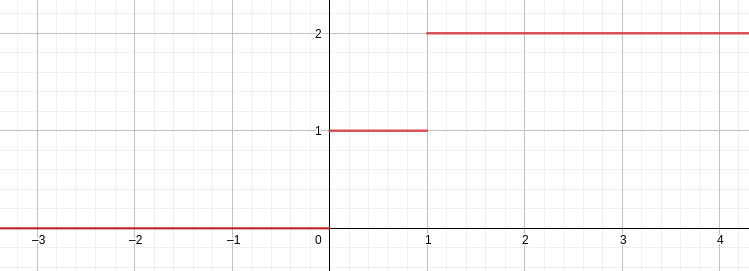</center>

In [16]:
let f1 x = 
    if x < 1. then 2. (* l'argument de f1 doit être un float donc il faut le comparer à un float *)
    else 1.;;
    
let abs_float x = (* valeur absolue sur les entiers *)
    if x < 0. then -.x else x;;
    
let f2 x = 
    if x < 0. then abs_float (x +. 3.) 
    else 3.;;
    
let f3 x = 
    if x < 0. then  0.
    else if x < 1. then 1.
    else 3.;;

val f1 : float -> float = <fun>


val abs_float : float -> float = <fun>


val f2 : float -> float = <fun>


val f3 : float -> float = <fun>


**Exercice** Écrire une fonction `n_solutions : float -> float -> float -> int` telle que `n_solutions a b c` renvoie le nombre de solutions de l'équation $ax^2 + bx + c$.

In [17]:
let n_solutions a b c =
    let delta = b**2. -. 4.*.a*.c in
    if abs delta < 0.0001 then 1 (* regarde si delta vaut 0, en prenant en compte les erreurs d'arrondis des float *)
    else if delta > 0. then 2
    else 0;;
n_solutions 3. 5. 2.;;    

val n_solutions : float -> float -> float -> int = <fun>


- : int = 2
